In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
del df['CUST_ID']

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


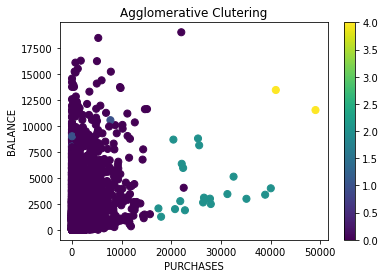

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['PURCHASES'] , df ["BALANCE"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("BALANCE")
plt.colorbar(scatter)

In [ ]:
"""import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))"""

'import matplotlib.pyplot as plt\nimport scipy.cluster.hierarchy as shc\nplt.figure(figsize=(15,10))\nplt.title("Customer Dendrograms")\ndend=shc.dendrogram(shc.linkage(df, method="complete"))'

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    5503
4    2564
1     786
2      56
3      41
dtype: int64

In [ ]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[ 7.87675442e+02  8.49448288e-01  5.09775413e+02  2.49350298e+02
   2.60721138e+02  4.83221366e+02  4.51368043e-01  1.30908566e-01
   3.46901779e-01  1.09266117e-01  2.28184627e+00  9.50227149e+00
   2.22908081e+03  9.03805320e+02  5.26784706e+02  1.48572171e-01
   1.13796111e+01  1.00000000e+00]
 [ 5.48720526e+03  9.54910300e-01  2.40789541e+03  1.55343184e+03
   8.54576730e+02  4.13952954e+03  5.31917954e-01  3.25465421e-01
   4.01272510e-01  3.11313742e-01  9.66793893e+00  3.05114504e+01
   1.13739880e+04  5.66199017e+03  1.97499024e+03  1.07193598e-01
   1.17302799e+01 -4.66293670e-15]
 [ 4.05814769e+03  9.88636375e-01  1.02737875e+03  1.18389464e+02
   9.08989286e+02  9.22757849e+02  4.71320321e-01  3.92315536e-02
   4.41152625e-01  1.05654714e-01  3.01785714e+00  1.86250000e+01
   4.26785714e+03  1.62493914e+03  2.27600316e+04  1.48808929e-03
   1.19107143e+01  5.53571429e-01]
 [ 5.14958549e+03  9.04434585e-01  1.95473678e+04  1.43043888e+04
   5.24297902e+03  4.86981405e+03  8.

Text(0, 0.5, 'Sqaured Error (Cost)')

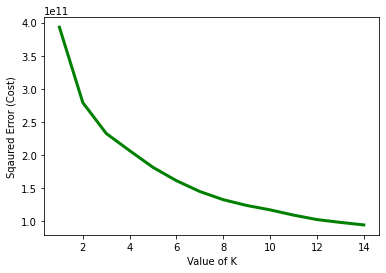

In [ ]:
Sum=[]
K=range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df)
  Sum.append(km.inertia_)
plt.plot(range(1, 15), Sum, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")


The best value of K=2

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
df["label"] = labels

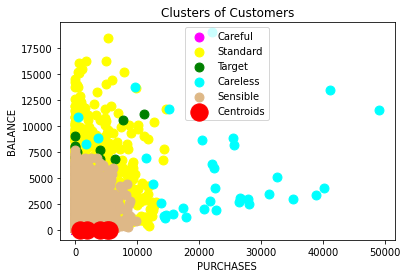

In [ ]:
plt.scatter(df["PURCHASES"][df.label == 0],          
            df["BALANCE"][df.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(df["PURCHASES"][df.label == 1],
           df["BALANCE"][df.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(df["PURCHASES"][df.label == 2],
           df["BALANCE"][df.label == 2],s=80,c='green',label='Target')
plt.scatter(df["PURCHASES"][df.label == 3], 
           df["BALANCE"][df.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(df["PURCHASES"][df.label == 4], 
           df["BALANCE"][df.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show() 

In [ ]:
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

1    7028
0    1922
dtype: int64

In [ ]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[3.83174174e+03 9.39821048e-01 2.36499888e+03 1.55149934e+03
  8.13882690e+02 2.59214186e+03 5.57655055e-01 3.45877762e-01
  4.05814518e-01 2.27473224e-01 6.57892004e+00 2.80046729e+01
  9.81438450e+03 4.29529635e+03 1.76439840e+03 1.49536909e-01
  1.17383178e+01 2.72845275e+00]
 [9.42784043e+02 8.60119256e-01 6.29797184e+02 3.29459957e+02
  3.00614658e+02 5.36507864e+02 4.71895469e-01 1.63131506e-01
  3.53091607e-01 1.09827330e-01 2.33570615e+00 1.10643508e+01
  3.03570872e+03 1.03059463e+03 6.17371474e+02 1.54860196e-01
  1.14567198e+01 8.57346241e-01]]


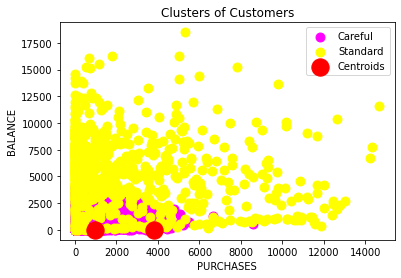

In [ ]:
plt.scatter(df["PURCHASES"][df.label == 0],          
            df["BALANCE"][df.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(df["PURCHASES"][df.label == 1],
           df["BALANCE"][df.label == 1],s=80,c='yellow',label='Standard')
# plt.scatter(df["PURCHASES"][df.label == 2],
#            df["BALANCE"][df.label == 2],s=80,c='green',label='Target')
# plt.scatter(df["PURCHASES"][df.label == 3], 
#            df["BALANCE"][df.label == 3],s=80,c='cyan',label='Careless')
# plt.scatter(df["PURCHASES"][df.label == 4], 
#            df["BALANCE"][df.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show() 

Since the best k=2, we re-implemented the code with only 2 clusters and it gives a clearer view of the clusters